PENDOLO SEMPLICE
================

### SCOPI PRINCIPALI DELL’ESPERIENZA ###

* Verificare che misure ripetute, ottenute in presenza di incertezze casuali, si distribuiscono secondo una distribuzione normale (gaussiana)
* Determinare il valore dell’accelerazione di gravità

### PRINCIPI FISICI SU CUI SI BASA L’ESPERIENZA ###

* Il *pendolo semplice* è costituito da un punto materiale (in cui si pensa sia concentrata la massa $m$) appeso per mezzo di un filo inestensibile e di massa trascurabile. La posizione di equilibrio statico è quella con il filo in verticale. Se allontanato dalla posizione di equilibrio, il punto inizia ad oscillare lungo un arco di circonferenza, in un piano verticale.
* Le forze che agiscono sono la tensione del filo $\mathbf{T}_\mathrm{filo}$ e la forza peso $m \mathbf{g}$. L’equazione del moto è quindi:
$$ \mathbf{T}_\mathrm{filo} + m \mathbf{g} = m \mathbf{a} $$
* La massa $m$ oscilla lungo un arco di circonferenza di raggio $L$, e l’equazione del moto scritta lungo la componente parallela alla traiettoria ($\parallel$) risulta essere:
$$ - m g \sin \theta = m a_\parallel = m L \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}$$
* Se le oscillazioni sono piccole ($\theta\le 0.122\, \mathrm{rad}\simeq 7^\circ$), si può sostituire $\sin \theta$ con $\theta$, e si ottiene:
$$\frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+\frac{g}{L}\theta=0$$ che ammette come soluzione, posto $\omega^2 = g/L $:     
$$\theta = \theta_0 \sin (\omega t + \varphi )$$
* Il moto è quindi periodico con periodo 
$$T=2\pi\sqrt{\frac{L}{g}}$$

### ESECUZIONE DELL’ESPERIENZA ###

* Per avere angoli < $7^\circ$, spostare la sferetta dalla posizione di equilibrio di una distanza pari ad $\frac{1}{10}$ del valore di $L$ scelto. In questo modo $\theta = \arctan \frac{1}{10 } = 5.7^\circ$.
* La misura del periodo di oscillazione viene eseguita con un cronometro, misurando il tempo di $n$ ($\ge 5$) oscillazioni, e dividendo il risultato ottenuto per $n$.
* Si esegue la misura del raggio della sferetta $r$, della lunghezza del filo $l$ e si determina la lunghezza $L=r+l$ del pendolo, valutando l’incertezza $\Delta L$ di tale stima.
* Si esegue un elevato numero di misure (circa 100) del periodo $T$ di oscillazione del pendolo, per un valore fissato della lunghezza $L$ (Obiettivo 1).
* Si esegue un numero adeguato di misure ($\ge 5$) del periodo $T$ di oscillazione del pendolo per diversi (almeno 5) valori di lunghezza $L$ (Obiettivo 2).

In [6]:
### Analisi dei dati ###

In [7]:
# Carico le librerie matematiche, grafiche e statistiche

%pylab
%matplotlib inline
from scipy import stats

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [8]:
# Inserire qui il vettore T contenente le misure sperimentali del periodo del pendolo [s]:

T = array([ 2.07 , 2.04 , 2.12 , 1.44 , 2.37 , 1.94 ,
            2.37 , 1.80 , 1.96 , 1.87 , 2.10 , 1.58 ,
            2.18 , 2.07 , 2.29 , 1.96 , 2.12 , 1.98  ])

N       = len(T)                         # calcolo la lunghezza del vettore T, cioè il numero di misure effettuate

Tmedio  = mean(T)                        
Tstd    = std(T)

print 'T = %4.2f +/- %4.2f s'%(Tmedio,Tstd)

T = 2.01 +/- 0.23 s


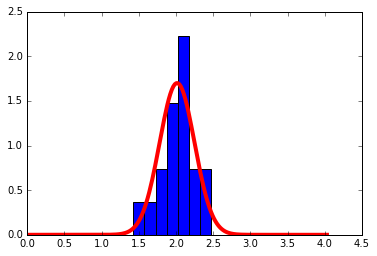

In [9]:
# Creo una suddivisione dell'intervallo [0,A] in classi di ampiezza dT=0.15
# traslo tutte le classi di dT/2 per centrarle rispetto all'origine

dT    = 0.15                             # ampiezza delle classi
A     = 2*Tmedio                         # ampiezza dell'intervallo [0,A]
bins  = arange(0,A,dT)+dT/2.             # estremi delle classi

# Creo un istogramma delle misure
# (si noti la differenza tra normed=True e normed=False)

hist(T,bins,normed=True)

# Sovrappongo all'istogramma il grafico della funzione a campana di Gauss

x     = linspace(0,A,200)
plot(x,stats.norm.pdf(x,loc=Tmedio,scale=Tstd),'r',linewidth=4)

savefig('istogramma_T.pdf')                # salvo la figura con l'istogramma

In [10]:
# Genero un vettore di valori di g calcolati a partire dalle misure di T usando la formula teorica
# nella quale qui per esempio ho post L=1
# Eseguo poi una stima diretta dell'errore su g 

L = 1    # m
g=4*pi**2*L/T**2
gmedio=mean(g)
gstd=std(g)
print 'g = %4.2f +/- %4.2f m/s**2  (errore stimato direttamente)'%(gmedio,gstd)

# Aggiungere qui la stima dell'errore mediante la formula di propagazione degli errori

g = 10.21 +/- 2.92 m/s**2  (errore stimato direttamente)


### Minimi quadrati ###

Si disegni il grafico dei punti sperimentali $(x_i=L_i, y_i=T_i^2)$ e si interpolino linearmente i dati con il metodo dei minimi quadrati. 
La retta interpolante è $y=mx+q$ con $q=0$ e $m=4\pi^2/g$. Il parametro $m$ si ricava dalla formula
$$
m=\frac{N\sum\limits_{i=0}^N x_i\,y_i-\sum\limits_{i=0}^N x_i\,\cdot\,\sum\limits_{i=0}^N y_i}{N\sum\limits_{i=0}^N x_i^2 - \left(\sum\limits_{i=0}^N x_i\right)^2}
$$

In [16]:
# Metodo dei minimi quadrati

# Inserire qui i valori sperimentali:

L    = array([  4.14 ,  5.16 ,  6.17 ,  7.18 ,  8.19 ,  9.11 , 10.12 , 11.13 , 12.14 , 13.15 , 
               14.11 , 15.12 , 16.13 , 17.14 , 18.15 , 19.16 , 20.17 , 21.18 , 22.19 , 23.20])
T    = array([ 3.28 , 4.63 , 4.52 , 5.47 , 6.08 , 5.83 ,
               6.30 , 6.56 , 7.17 , 7.56 , 7.42 , 7.81 ,
               7.39 , 7.79 , 9.02 , 8.92 , 9.30 , 9.04 ,
               9.41 , 9.48])

In [19]:
x  = L
y  = T**2

N  = len(L)

m  = (N*sum(x*y)-sum(x)*sum(y))/(N*sum(x*x)-(sum(x))**2)

gmes  = 4*pi**2/m
print 'accelerazione di gravità misurata: g = %4.2f'%gmes

accelerazione di gravità misurata: g = 9.69


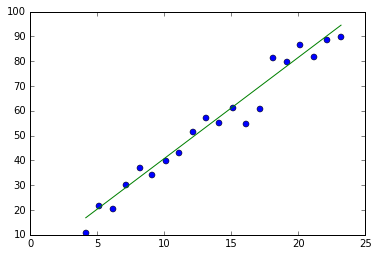

In [18]:
plot(L,T**2,'o')
plot(x,m*x)

### Esercizio ###

Ricavare anche il valore di $q$ e le incertezze $\sigma_m$, $\sigma_q$ utilizzando le formule riportate nella scheda. Stimare l'incertezza sul valore di $g$ calcolato usando il metodo dei minimi quadrati.

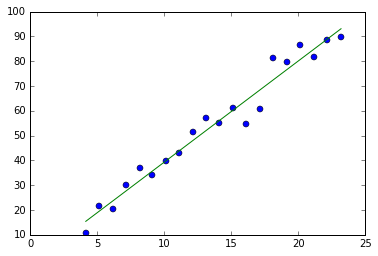

In [21]:
from scipy.stats import linregress

m,q,r,p,stderr=linregress(L,T**2)

plot(L,T**2,'o')
plot(L,m*L+q)

# Calcolare l'incertezza su g utilizzando le formule di propagazione dell'incertezza riportate nella scheda